In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
%matplotlib inline

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def get_loader(train: bool, batch_size: int):
  dataset = datasets.MNIST('mnist', train = train, download = True,
                           transform = transforms.ToTensor())
  
  loader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = True)

  return loader

train = get_loader(True, 64)
val = get_loader(False, 64)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



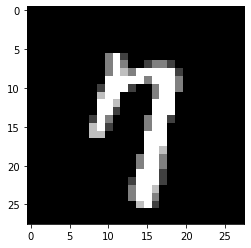

In [ ]:
plt.imshow(next(iter(train))[0][0].reshape(28, 28), cmap = 'gray');

# 1. Accuracy 97.5 on MNIST

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.LeakyReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(512, 256),
    nn.LeakyReLU(),
    nn.Dropout(p = 0.3),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Dropout(p = 0.3),
    nn.Linear(128, 64),
    nn.LeakyReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(32, 10),
    nn.LeakyReLU(),
    nn.LogSoftmax(dim = 1)
).to(device)

In [ ]:
def accuracy(model, val):
  model.eval()
  total = 0
  correct = 0
  for X, y in val:
    X = X.to(device).view(-1, 784)
    res = model(X)
    res = res.argmax(dim=1)
    total += res.shape[0]
    correct += (res == y.to(device)).sum().item()
  model.train()
  return correct / total

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
criterion = nn.NLLLoss().to(device)

In [ ]:
train_losses = []
for epoch in tqdm(range(25), desc = 'Epoch'):
  for X, y in tqdm(train):
    X = X.to(device).view(-1, 784)

    optimizer.zero_grad()

    output = model(X)
    loss = criterion(output, y.to(device))
    loss.backward()

    train_losses.append(loss.item())
    optimizer.step()

  print('\n' + f'EPOCH {epoch + 1}')
  print('-'*25)
  print(f'Accuracy on train: {accuracy(model, train):.5f}')
  print(f'Accuracy on validation: {accuracy(model, val):.5f}')
  print(f'Loss: {loss.item():.5f}')
  print('-'*25)


Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 1
-------------------------
Accuracy on train: 0.83648
Accuracy on validation: 0.83940
Loss: 0.64049
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 2
-------------------------
Accuracy on train: 0.91573
Accuracy on validation: 0.91540
Loss: 0.75238
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 3
-------------------------
Accuracy on train: 0.93708
Accuracy on validation: 0.93790
Loss: 0.58386
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 4
-------------------------
Accuracy on train: 0.95023
Accuracy on validation: 0.94940
Loss: 0.22530
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 5
-------------------------
Accuracy on train: 0.95818
Accuracy on validation: 0.95610
Loss: 0.06174
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 6
-------------------------
Accuracy on train: 0.96442
Accuracy on validation: 0.95990
Loss: 0.22083
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 7
-------------------------
Accuracy on train: 0.96868
Accuracy on validation: 0.96220
Loss: 0.39690
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 8
-------------------------
Accuracy on train: 0.97317
Accuracy on validation: 0.96510
Loss: 0.25342
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 9
-------------------------
Accuracy on train: 0.97637
Accuracy on validation: 0.96800
Loss: 0.22201
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 10
-------------------------
Accuracy on train: 0.97932
Accuracy on validation: 0.96980
Loss: 0.01354
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 11
-------------------------
Accuracy on train: 0.98097
Accuracy on validation: 0.96950
Loss: 0.36026
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 12
-------------------------
Accuracy on train: 0.98275
Accuracy on validation: 0.97010
Loss: 0.05976
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 13
-------------------------
Accuracy on train: 0.98472
Accuracy on validation: 0.97250
Loss: 0.00950
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 14
-------------------------
Accuracy on train: 0.98675
Accuracy on validation: 0.97350
Loss: 0.30519
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 15
-------------------------
Accuracy on train: 0.98848
Accuracy on validation: 0.97600
Loss: 0.00497
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 16
-------------------------
Accuracy on train: 0.98987
Accuracy on validation: 0.97640
Loss: 0.32042
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 17
-------------------------
Accuracy on train: 0.99043
Accuracy on validation: 0.97780
Loss: 0.00428
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 18
-------------------------
Accuracy on train: 0.99177
Accuracy on validation: 0.97740
Loss: 0.03024
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 19
-------------------------
Accuracy on train: 0.99210
Accuracy on validation: 0.97670
Loss: 0.12789
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 20
-------------------------
Accuracy on train: 0.99262
Accuracy on validation: 0.97660
Loss: 0.01496
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 21
-------------------------
Accuracy on train: 0.99397
Accuracy on validation: 0.97800
Loss: 0.00633
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 22
-------------------------
Accuracy on train: 0.99412
Accuracy on validation: 0.97850
Loss: 0.00763
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 23
-------------------------
Accuracy on train: 0.99487
Accuracy on validation: 0.97830
Loss: 0.00314
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 24
-------------------------
Accuracy on train: 0.99498
Accuracy on validation: 0.97840
Loss: 0.01603
-------------------------


  0%|          | 0/938 [00:00<?, ?it/s]


EPOCH 25
-------------------------
Accuracy on train: 0.99475
Accuracy on validation: 0.97770
Loss: 0.07653
-------------------------


In [ ]:
plt.plot(train_losses)

Достичь 97.5% на валидации получилось, но разрыв между точностью на трейне и валидации довольно большой. Вряд ли получится сильно улучшить результат не прибегая к сверткам.

# 2. MNIST morphing gif

In [ ]:
class Autoencoder_morph(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
          nn.Linear(784, 512),
          nn.LeakyReLU(),
          nn.Linear(512, 256),
          nn.LeakyReLU(),
          nn.Linear(256, 128),
          nn.LeakyReLU(),
          nn.Linear(128, 64),
          nn.LeakyReLU(),
          nn.Linear(64, 8),
        )
        
        self.decode = nn.Sequential(
          nn.Linear(8, 64),
          nn.LeakyReLU(),
          nn.Linear(64, 128),
          nn.LeakyReLU(),
          nn.Linear(128, 256),
          nn.LeakyReLU(),
          nn.Linear(256, 512),
          nn.LeakyReLU(),
          nn.Linear(512, 784),
          nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.decode(self.encode(x))

encoder_morph = Autoencoder_morph().to(device)
criterion_morph = torch.nn.MSELoss().to(device)

optimizer_morph = torch.optim.Adam(encoder_morph.parameters())

In [ ]:
for epoch in tqdm(range(10)):
    train_loss = 0
    for data, _ in tqdm(train):

        data = data.to(device).view(-1, 784)
        
        optimizer_morph.zero_grad()
        
        reconstructed = encoder_morph(data)
        loss = criterion_morph(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer_morph.step()

    print('epoch %d, loss %.4f' % (epoch, train_loss / len(train)))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

epoch 0, loss 0.0472


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 1, loss 0.0271


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 2, loss 0.0226


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 3, loss 0.0200


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 4, loss 0.0187


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 5, loss 0.0177


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 6, loss 0.0168


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 7, loss 0.0159


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 8, loss 0.0152


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 9, loss 0.0147


In [ ]:
def get(x):
    return train.dataset[x][0].to(device).view(1, 784)

def imshow(img):
    pic = img.cpu().numpy().astype('float')
    plt.axis('off')
    return plt.imshow(pic, cmap='Greys', animated=True)

def morph(inputs, steps, delay):
    latent = [encoder_morph.encode(get(k)).data for k in inputs]
    fig = plt.figure()
    images = []
    for a, b in zip(latent, latent[1:] + [latent[0]]):
        for t in np.linspace(0, 1, steps):
            c = a*(1-t)+b*t
            morphed = encoder_morph.decode(c).data
            morphed = morphed.view(28, 28)
            images.append([imshow(morphed)])
    
    ani = animation.ArtistAnimation(fig, images, interval=delay)

    display(HTML(ani.to_html5_video()))

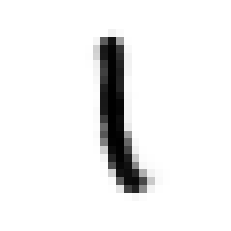

In [ ]:
cdmorph(np.random.randint(0, len(train.dataset), 30), 20, 50)

Морфинг получился неплохим. Для морфинга таких картинок такой архитектуры, вероятно, достаточно. Для понижения размерности была использована немного другая архитектура.

# 3. Dimentionality reduction using autoencoder

In [ ]:
class Autoencoder_dr(nn.Module):
  def __init__(self):
        super().__init__()
        
        self.encode = nn.Sequential(
          nn.Linear(784, 512),
          nn.LeakyReLU(),
          nn.Linear(512, 256),
          nn.LeakyReLU(),
          nn.Linear(256, 128),
          nn.LeakyReLU(),
          nn.Linear(128, 64),
          nn.LeakyReLU(),
          nn.Linear(64, 32),
          nn.LeakyReLU(),
          nn.Linear(32,2)
        )

        self.decode = nn.Sequential(
          nn.Linear(2, 32),
          nn.LeakyReLU(),
          nn.Linear(32, 64),
          nn.LeakyReLU(),
          nn.Linear(64, 128),
          nn.LeakyReLU(),
          nn.Linear(128, 256),
          nn.LeakyReLU(),
          nn.Linear(256, 512),
          nn.LeakyReLU(),
          nn.Linear(512, 784),
          nn.Sigmoid()
        )
    
  def forward(self, x):
      return self.decode(self.encode(x))

encoder_dr= Autoencoder_dr().to(device)
criterion_dr = torch.nn.MSELoss().to(device)

optimizer_dr = torch.optim.Adam(encoder_dr.parameters())


In [ ]:
for epoch in tqdm(range(10)):
    train_loss = 0
    for data, _ in tqdm(train):

        data = data.to(device).view(-1, 784)
        
        optimizer_dr.zero_grad()
        
        reconstructed = encoder_dr(data)
        loss = criterion_dr(data, reconstructed)
        
        loss.backward()

        train_loss += loss.item()
        optimizer_dr.step()

    print('epoch %d, loss %.4f' % (epoch, train_loss / len(train)))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

epoch 0, loss 0.0557


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 1, loss 0.0431


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 2, loss 0.0405


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 3, loss 0.0394


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 4, loss 0.0385


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 5, loss 0.0378


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 6, loss 0.0378


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 7, loss 0.0376


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 8, loss 0.0374


  0%|          | 0/938 [00:00<?, ?it/s]

epoch 9, loss 0.0372


In [ ]:
X_reducted, y_labels = [], []
for X, y in train:
  X_reducted.append(encoder_dr.encode(X.to(device).view(-1, 784)).cpu().detach().numpy())
  y_labels.append(y.detach().numpy())
X_reducted = np.concatenate(X_reducted)
y_labels = np.concatenate(y_labels)

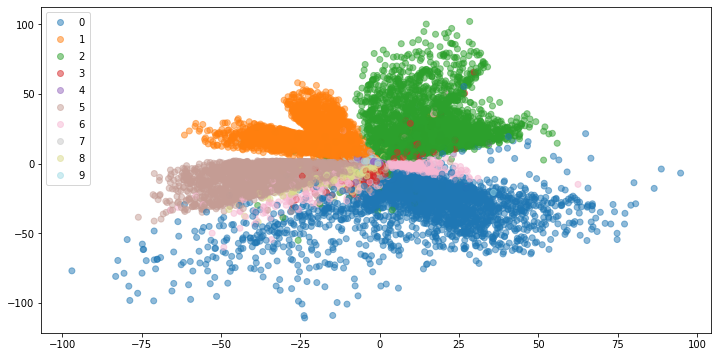

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
plot = ax.scatter(X_reducted[:, 0], X_reducted[:, 1], cmap = 'tab20', c=y_labels, alpha=0.5)

ax.legend(*plot.legend_elements())


На самом деле результат получился посредственным. Опять же, если не применять свертки это, вероятно, результат около максимума.

Различимы только 0, 1, 2, 5, и немного 8. Остальные цифры практически смешались в кашу